In [1]:
from __future__ import division

import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plt

from learning2learn.util import evaluate_secondOrder, load_image_dataset

Using TensorFlow backend.
/Users/reubenfeinman/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
test_folder = '../data/images_generated/test'

## First, lets make sure our test images are labelled properly

In [3]:
feature_file = os.path.join(test_folder, 'data.csv')
df = pd.read_csv(feature_file, index_col=0)

In [4]:
df.head(5)

,shape,color,texture
0,50,50,50
1,50,50,51
2,50,50,52
3,50,50,53
4,50,50,54


In [5]:
imgs = load_image_dataset(test_folder)

In [6]:
def show(obj, img):
    obj.imshow(img)
    obj.axis('off')

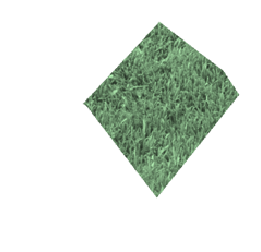

In [7]:
plt.figure(figsize=(4,4))
show(plt, imgs[7])
plt.show()

## Now, let's test the trial-creation code

In [8]:
def make_trial(shapes, colors, textures):
    # create a random trial
    ix = np.arange(len(shapes))

    while True:
        baseline = np.random.choice(ix)
        shape = shapes[baseline]
        color = colors[baseline]
        texture = textures[baseline]
        # only matches in shape
        shape_matches = \
        np.where((shapes == shape) &
                 (colors != color) &
                 (textures != texture))[0]
        # only matches in color
        color_matches = \
        np.where((shapes != shape) &
                 (colors == color) &
                 (textures != texture))[0]
        # only matches in texture
        texture_matches = \
        np.where((shapes != shape) &
                 (colors != color) &
                 (textures == texture))[0]

        if len(shape_matches) > 0 and len(color_matches) > 0 and len(
                texture_matches) > 0:
            break  # make sure we have an option for each image...

    shape_match = np.random.choice(shape_matches)
    color_match = np.random.choice(color_matches)
    texture_match = np.random.choice(texture_matches)

    return [baseline, shape_match, color_match, texture_match]

def build_test_trials(test_folder, nb_trials, target_size=(200, 200)):
    # First, load the images
    imgs = load_image_dataset(test_folder, target_size=target_size)
    # Collect the list of shapes, colors and textures
    feature_file = os.path.join(test_folder, 'data.csv')
    df = pd.read_csv(feature_file, index_col=0)
    shapes = df['shape'].as_matrix()
    colors = df['color'].as_matrix()
    textures = df['texture'].as_matrix()

    # Sample the trials
    ix = []
    for i in range(nb_trials):
        ix.extend(make_trial(shapes, colors, textures))
    ix = np.asarray(ix)
    return imgs[ix]

In [9]:
X_test = build_test_trials(test_folder, nb_trials=1000, target_size=(200, 200))

In [10]:
print(X_test.shape)

(4000, 200, 200, 3)


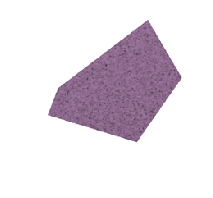

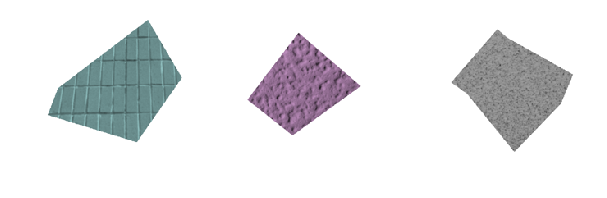

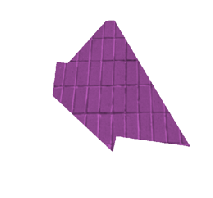

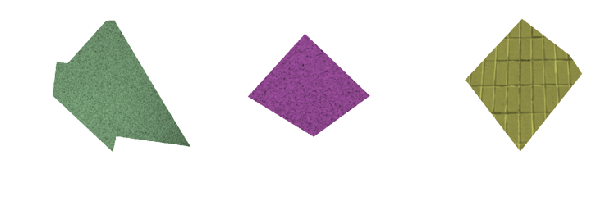

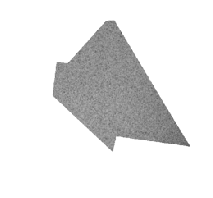

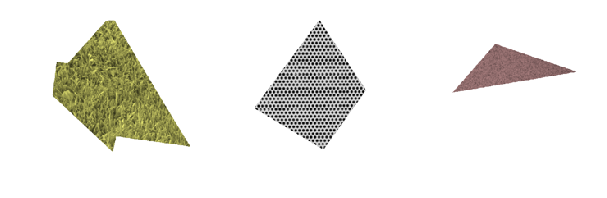

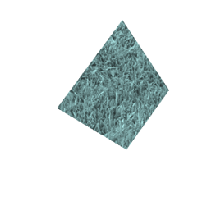

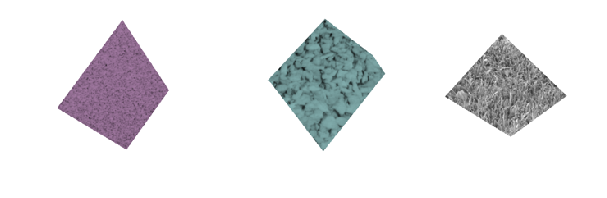

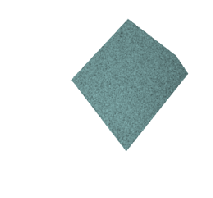

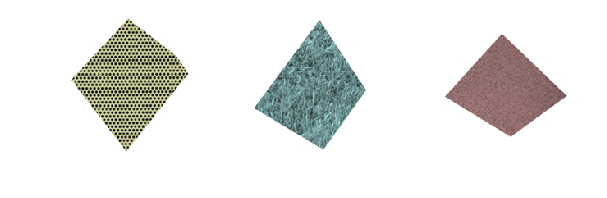

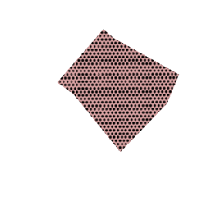

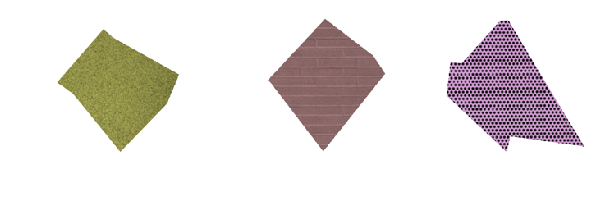

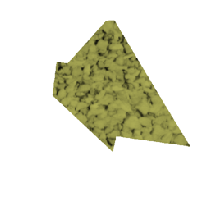

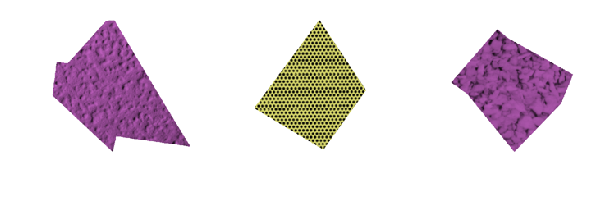

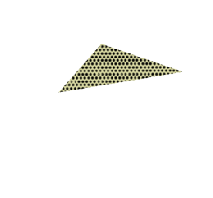

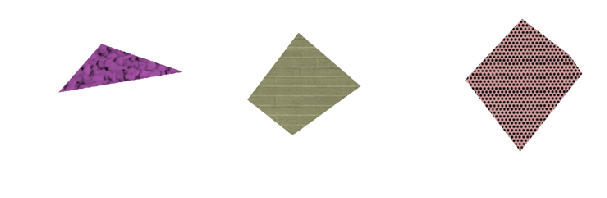

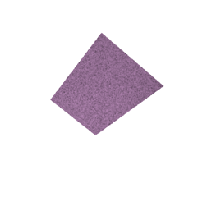

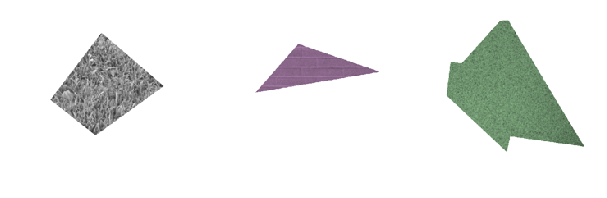

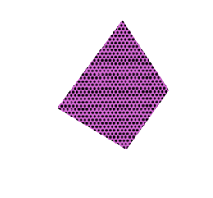

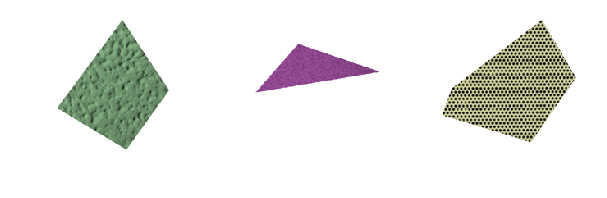

In [11]:
for i in range(10):
    plt.figure(figsize=(3,3))
    show(plt, X_test[i*4])
    plt.show()
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,3))
    for j in range(1,4):
        show(axes[j-1], X_test[i*4+j])
    plt.show()
    print('\n')
        